## Video Game Sales Prediction

Given *data on video game sales*, we need to predict the **sales** of a given video game.

Data source: https://www.kaggle.com/datasets/gregorut/videogamesales

### Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [71]:
data = pd.read_csv('archive/vgsales.csv', index_col='Rank')
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


### Preprocessing

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [73]:
columns_to_drop = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

data.drop(columns_to_drop, axis=1, inplace=True)

In [74]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [75]:
data.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [76]:
data['Year'] = data['Year'].fillna(data['Year'].mean())

In [77]:
data = data.dropna(axis=0).reset_index(drop=True)

In [78]:
data.isnull().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [79]:
data

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.74
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
4,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16535,GBA,2002.0,Platform,Kemco,0.01
16536,GC,2003.0,Shooter,Infogrames,0.01
16537,PS2,2008.0,Racing,Activision,0.01
16538,DS,2010.0,Puzzle,7G//AMES,0.01


### Encoding

In [80]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [81]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [82]:
data['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [83]:
counts = data['Publisher'].value_counts()

In [84]:
data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

In [85]:
data['Publisher'].value_counts()

Publisher
Small Publisher                           3342
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Mic

In [86]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [87]:
def onehot_encode(data, columns):
    df = data.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column], dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [88]:
data = onehot_encode(data, onehot_columns)

In [89]:
data

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
0,2006.0,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,40.24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1996.0,31.37,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,2002.0,0.01,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16536,2003.0,0.01,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16537,2008.0,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16538,2010.0,0.01,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling

In [90]:
y = data['Global_Sales']
X = data.drop('Global_Sales', axis=1)

In [91]:
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16535     0.01
16536     0.01
16537     0.01
16538     0.01
16539     0.01
Name: Global_Sales, Length: 16540, dtype: float64

In [92]:
X

,Year,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
0,2006.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1996.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,2002.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16536,2003.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16537,2008.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16538,2010.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[-0.07006962, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       [-3.69816165, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       [ 0.27546295, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       ...,
       [ 0.27546295, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       [ 0.62099552, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       [-0.58836848, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605]], shape=(16540, 91))

In [94]:
X.shape

(16540, 91)

### Training

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [101]:
inputs = tf.keras.Input(shape=(91,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer = optimizer,
    loss = 'mse'
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1337 - val_loss: 3.7052
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9301 - val_loss: 3.6736
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8812 - val_loss: 3.6251
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8549 - val_loss: 3.7764
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8154 - val_loss: 3.6512
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7949 - val_loss: 3.6652
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7710 - val_loss: 3.6650
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7529 - val_loss: 3.5480
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7565 - val_loss: 3.5048
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7327 - val_loss: 3.5180
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7241 - val_loss: 3.5216
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━━━

### Results

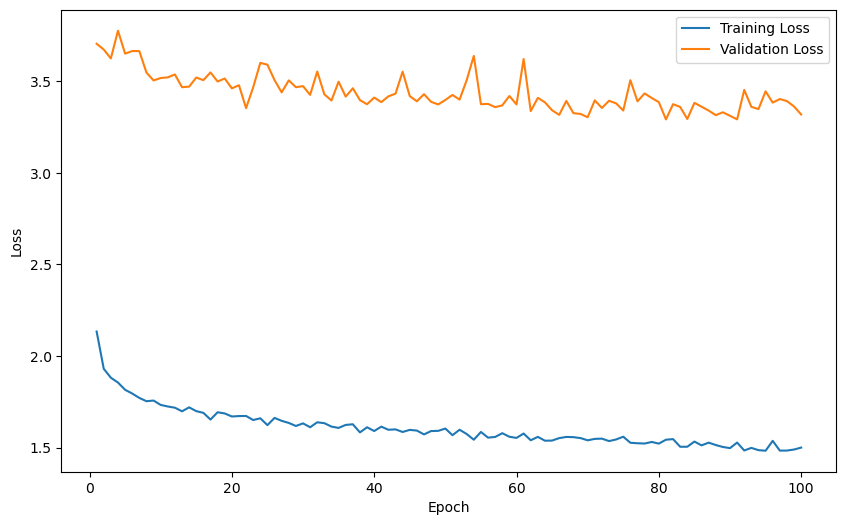

In [102]:
plt.figure(figsize=(10, 6))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [104]:
y_pred = np.squeeze(model.predict(X_test))
y_pred

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([ 0.04502755,  1.2683837 ,  0.1068489 , ...,  0.79172283,
       -0.69877714,  1.1776206 ], shape=(3308,), dtype=float32)

In [106]:
print("R2 Score: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score: -0.5004


In [108]:
model.evaluate(X_test, y_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2931


2.293081045150757

In [109]:
history.history['val_loss']

[3.7052419185638428,
 3.673631191253662,
 3.625059127807617,
 3.776371955871582,
 3.651197910308838,
 3.665245771408081,
 3.6649856567382812,
 3.547970771789551,
 3.5048444271087646,
 3.517979860305786,
 3.521615743637085,
 3.5376081466674805,
 3.467991828918457,
 3.4710192680358887,
 3.520573854446411,
 3.506404399871826,
 3.5485873222351074,
 3.499004602432251,
 3.515316963195801,
 3.4616458415985107,
 3.4786598682403564,
 3.353602647781372,
 3.4677045345306396,
 3.6008846759796143,
 3.5908384323120117,
 3.5064492225646973,
 3.4398293495178223,
 3.5052103996276855,
 3.4678750038146973,
 3.473708152770996,
 3.4261202812194824,
 3.5535497665405273,
 3.4288687705993652,
 3.395364761352539,
 3.498034715652466,
 3.4164390563964844,
 3.462059736251831,
 3.397400140762329,
 3.3748133182525635,
 3.411231756210327,
 3.386547565460205,
 3.417867660522461,
 3.432966470718384,
 3.5528757572174072,
 3.4192986488342285,
 3.3909964561462402,
 3.429758071899414,
 3.3880019187927246,
 3.3736522197723